<a href="https://colab.research.google.com/github/YvixMiHo/Neural_Net_For_Classification_Problems/blob/main/Neural_Network_CNN_Multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
#Function defs
def view_random_image(target_dir, target_class): 
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/"+ random_image[0])

  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  return img


In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-24 00:01:23--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.125.128, 142.250.136.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   180MB/s    in 2.7s    

2022-06-24 00:01:25 (180 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
#walk through data
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data.zip"):
  print(f"There are {len(dirnames)} directroies and {len(filenames)} images in '{dirpath}'.")

In [ ]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Jun 24 00:01 .
drwxr-xr-x  1 root root 4096 Jun 24 00:01 ..
drwxr-xr-x 12 root root 4096 Jun 24 00:01 test
drwxr-xr-x 12 root root 4096 Jun 24 00:01 train


In [ ]:
test_dir = "10_food_classes_all_data/train/"
train_dir = "10_food_classes_all_data/train/"

In [ ]:
# how to visualize with out tensorflow
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


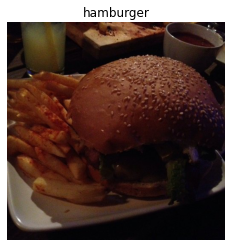

In [ ]:
import random
img = view_random_image(target_dir = train_dir,
                        target_class =random.choice(class_names))

In [ ]:
random.choice(class_names)

'pizza'

In [18]:
#rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [19]:
len(test_data)

235

In [20]:
len(train_data)

235

In [21]:
model_1 = Sequential([
    Conv2D(10,3, input_shape = (224, 224, 3)),                  
    Activation(activation = "relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation = "sigmoid") 
])

In [22]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(lr = 0.001),
               metrics = ["accuracy"]
               )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
histogram_1 = model_1.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data)
                          )

Epoch 1/5
235/235 [==============================] - 72s 298ms/step - loss: 2.1632 - accuracy: 0.2099 - val_loss: 1.9133 - val_accuracy: 0.3623
Epoch 2/5
235/235 [==============================] - 66s 281ms/step - loss: 1.7846 - accuracy: 0.3956 - val_loss: 1.3133 - val_accuracy: 0.5823
Epoch 3/5
235/235 [==============================] - 66s 283ms/step - loss: 1.1553 - accuracy: 0.6133 - val_loss: 0.6499 - val_accuracy: 0.8459
Epoch 4/5
235/235 [==============================] - 68s 290ms/step - loss: 0.4916 - accuracy: 0.8469 - val_loss: 0.2348 - val_accuracy: 0.9448
Epoch 5/5
235/235 [==============================] - 69s 296ms/step - loss: 0.1482 - accuracy: 0.9611 - val_loss: 0.0462 - val_accuracy: 0.9932


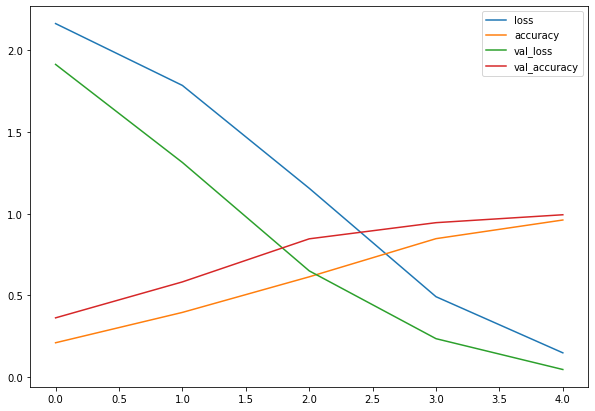

In [24]:
import pandas as pd
pd.DataFrame(histogram_1.history).plot(figsize=(10,7))